# EDA 

### 참고 링크

https://melvincabatuan.github.io/Keras-Tutorial-Deep-Learning-in-Python-Walkthrough/

### 데이터 불러오기

In [113]:
import pandas as pd

import warnings
import matplotlib.pyplot as plt

## 모델 평가를 위한 패키지
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.exceptions import ConvergenceWarning

from sklearn.model_selection import cross_val_score, cross_validate

import seaborn as sns
import numpy as np

# Read in white wine data 
wines = pd.read_csv("train.csv", sep=',')
x_test = pd.read_csv("test.csv")

### 데이터 시각화

<AxesSubplot:>

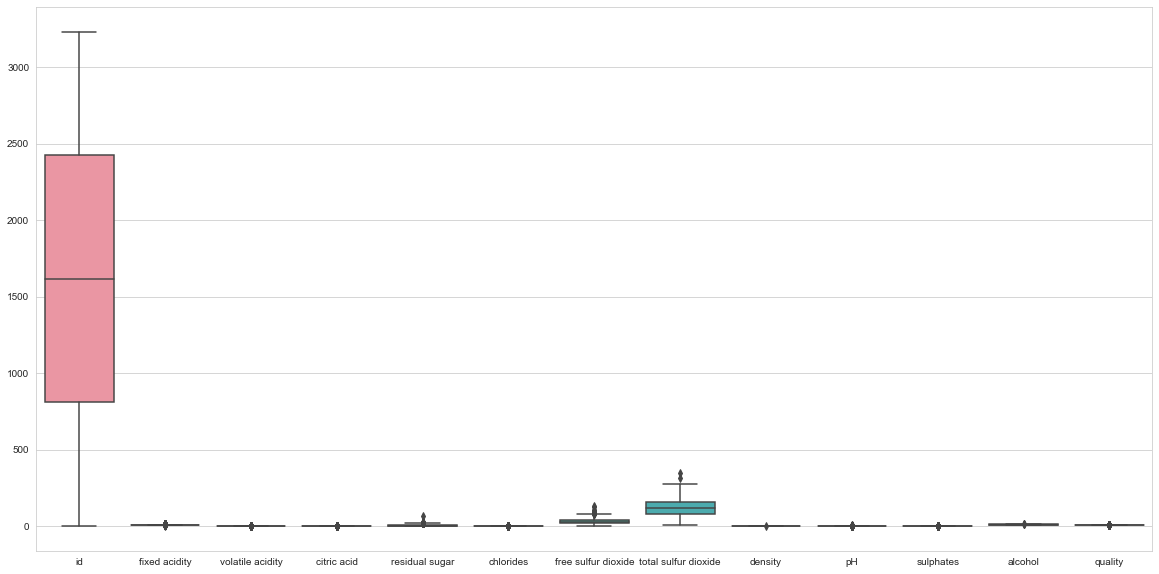

In [114]:
%matplotlib inline
%config Completer.use_jedi = False

plt.rcParams['font.family'] = 'Nanum Gothic'
plt.rcParams["figure.figsize"] = (20,10)

sns.set_style("whitegrid")
sns.boxplot(data = wines) 

### 전처리

<AxesSubplot:>

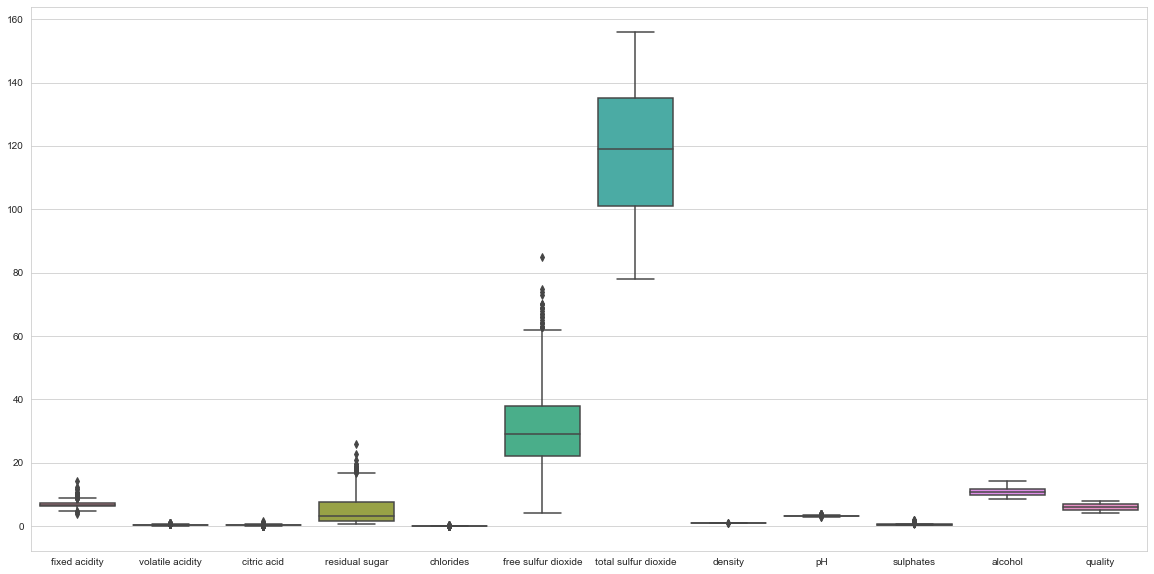

In [115]:
# 미사용 컬럼 제거
x_test = x_test.drop(["id"],axis=1)
wines = wines.drop(["id"],axis=1)
wines.head()

# outlier 제거

column_names_for_remove_outliers = ['total sulfur dioxide']

for column_name in column_names_for_remove_outliers:
    y = wines[column_name]
    removed_outliers = y.between(y.quantile(.25), y.quantile(.75))
    index_names = wines[~removed_outliers].index
    wines.drop(index_names, inplace=True)

sns.boxplot(data=wines)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,8.0,0.18,0.37,1.3,0.040,15.0,96.0,0.99120,3.06,0.61,12.1,white,6
1,7.5,0.38,0.29,4.9,0.021,38.0,113.0,0.99026,3.08,0.48,13.0,white,7
2,6.1,0.27,0.33,2.2,0.021,26.0,117.0,0.98860,3.12,0.30,12.5,white,6
3,6.4,0.32,0.50,10.7,0.047,57.0,206.0,0.99680,3.08,0.60,9.4,white,5
4,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,red,7


### Train 데이터와 Test 데이터로 나누고, 데이터 확인

In [116]:
wines_copy = wines.copy()

# Specify the data 
x_train = wines_copy.iloc[:,0:-1]  # 12 dimensions

# Specify the target labels and flatten the array 
y_train = np.ravel(wines_copy.quality)

wines_copy = wines_copy.drop(["quality"],axis=1)

def typeColumnToInt(typeStr):
    if typeStr == "white":
        return 0
    else:
        return 1

x_train.type = wines.type.apply(typeColumnToInt)
x_test.type = x_test.type.apply(typeColumnToInt)

In [117]:
x_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.3,0.31,0.25,6.65,0.032,30.0,138.0,0.99244,2.90,0.37,11.1,0
1,8.7,0.70,0.24,2.50,0.226,5.0,15.0,0.99910,3.32,0.60,9.0,1
2,6.9,0.63,0.01,2.40,0.076,14.0,39.0,0.99522,3.34,0.53,10.8,1
3,6.3,0.23,0.50,10.40,0.043,61.0,132.0,0.99542,2.86,0.46,9.1,0
4,6.9,0.54,0.04,3.00,0.077,7.0,27.0,0.99870,3.69,0.91,9.4,1


In [99]:
x_test.type.value_counts()

0    2420
1     811
Name: type, dtype: int64

In [118]:
x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,8.0,0.18,0.37,1.3,0.040,15.0,96.0,0.99120,3.06,0.61,12.1,0
1,7.5,0.38,0.29,4.9,0.021,38.0,113.0,0.99026,3.08,0.48,13.0,0
2,6.1,0.27,0.33,2.2,0.021,26.0,117.0,0.98860,3.12,0.30,12.5,0
5,6.0,0.33,0.38,9.7,0.040,29.0,124.0,0.99540,3.47,0.48,11.0,0
10,7.2,0.40,0.49,1.1,0.048,11.0,138.0,0.99290,3.01,0.42,9.3,0


In [119]:
y_train

array([6, 7, 6, ..., 6, 5, 7])

In [120]:
x_train.type.value_counts()

0    1494
1     137
Name: type, dtype: int64

### DecisionTreeClassifier를 이용한 분류

In [121]:
estimator = DecisionTreeClassifier(criterion='gini', max_depth=None, max_leaf_nodes=None, min_samples_split=2, min_samples_leaf=1, max_features=None)

estimator.fit(x_train, y_train)

y_predict = estimator.predict(x_train) 
score = metrics.accuracy_score(y_train, y_predict)
print("Train 정확도 : {}%".format(round(score * 100,1))) #1.0

#y_predict = estimator.predict(x_test) 
#score = metrics.accuracy_score(y_test, y_predict)
#print("Test 정확도 : {}%".format(round(score * 100,1))) #1.0

Train 정확도 : 100.0%


### DecisionTree 결과 시각화

In [122]:
from sklearn.tree import export_graphviz

# .dot 파일로 export 해줍니다
export_graphviz(estimator, out_file='tree.dot')

# 생성된 .dot 파일을 .png로 변환
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'decistion-tree.png', '-Gdpi=600'])

# jupyter notebook에서 .png 직접 출력
from IPython.display import Image
Image(filename = 'decistion-tree.png')

FileNotFoundError: [Errno 2] No such file or directory: 'dot'

### 나이브 베이즈를 통한 예측

In [123]:
estimator = GaussianNB()

estimator.fit(x_train, y_train)

y_predict = estimator.predict(x_train) 
score = metrics.accuracy_score(y_train, y_predict)
print("Train 정확도 : {}%".format(round(score * 100,1))) #1.0

y_predict = estimator.predict(x_test) 
y_predict
#score = metrics.accuracy_score(y_test, y_predict)
#print("Test 정확도 : {}%".format(round(score * 100,1))) #1.0

Train 정확도 : 45.7%


array([7, 5, 5, ..., 6, 7, 7])

### 앙상블 기법을 이용한 예측

In [124]:
estimator = VotingClassifier(estimators=[('lr', LogisticRegression()),
                                         ('kn', KNeighborsClassifier()),
                                         ('dt', DecisionTreeClassifier())], voting='hard', weights=None)

estimator.fit(x_train, y_train)

y_predict = estimator.predict(x_train) 
score = metrics.accuracy_score(y_train, y_predict)
print("Train 정확도 : {}%".format(round(score * 100,1))) #1.0

y_predict = estimator.predict(x_test) 

#y_predict = estimator.predict(x_test) 
#score = metrics.accuracy_score(y_test, y_predict)
#print("Test 정확도 : {}%".format(round(score * 100,1))) #1.0

Train 정확도 : 78.1%


/Users/david/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [74]:
y_predict

array([7, 6, 6, 7, 5, 6, 6, 5, 6, 5, 6, 5, 6, 6, 7, 6, 6, 6, 5, 6, 6, 6,
       5, 5, 6, 6, 7, 6, 5, 5, 6, 6, 5, 6, 6, 6, 6, 7, 7, 7, 6, 5, 5, 6,
       6, 6, 5, 5, 6, 6, 6, 6, 5, 7, 6, 6, 7, 6, 6, 6, 5, 7, 6, 6, 6, 6,
       6, 6, 6, 6, 5, 6, 5, 6, 8, 6, 6, 6, 6, 5, 6, 6, 6, 7, 6, 6, 6, 6,
       6, 5, 5, 5, 6, 7, 6, 5, 6, 6, 6, 7, 6, 5, 6, 6, 6, 5, 6, 7, 6, 6,
       6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6,
       6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6,
       7, 6, 6, 4, 5, 6, 6, 6, 6, 7, 6, 6, 5, 7, 6, 6, 6, 6, 5, 6, 6, 6,
       6, 5, 5, 6, 7, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 7,
       5, 7, 5, 6, 5, 6, 5, 6, 6, 7, 6, 6, 7, 6, 6, 6, 5, 6, 6, 6, 6, 7,
       6, 6, 7, 5, 6, 6, 6, 6, 7, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 7,
       5, 6, 7, 7, 5, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 6, 7, 5, 6, 5, 6, 5,
       6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 5,
       7, 7, 5, 6, 6, 5, 6, 7, 6, 5, 5, 7, 6, 6, 7,

### 랜덤 포레스트를 이용한 예측

In [125]:
%%timeit

estimator = RandomForestClassifier()
estimator.fit(x_train, y_train)

y_predict = estimator.predict(x_train) 
score = metrics.accuracy_score(y_train, y_predict)
print("Train 정확도 : {}%".format(round(score * 100,1))) #1.0

y_predict = estimator.predict(x_test) 

# y_predict = estimator.predict(x_test) 
# score = metrics.accuracy_score(y_test, y_predict)
# print("Test 정확도 : {}%".format(round(score * 100,1))) #1.0

y_predict

Train 정확도 : 100.0%
Train 정확도 : 100.0%
Train 정확도 : 100.0%
Train 정확도 : 100.0%
Train 정확도 : 100.0%
Train 정확도 : 100.0%
Train 정확도 : 100.0%
Train 정확도 : 100.0%
302 ms ± 1.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [127]:
# 제출용 sample 파일을 불러옵니다.
submission = pd.read_csv('sample_submission.csv')
submission['quality'] = y_predict

submission.to_csv("submission.csv", index=False)